# Water Quality Classification

👉 This study will examine the dataset named as **"Water Quality"** under the 'water-potability' file at Kaggle website [external link text](https://www.kaggle.com/adityakadiwal/water-potability).

Context of this dataset is about access to safe drinking-water which is essential to health, a basic human right and a component of effective policy for health protection.

Features' Descriptions:

1. ph: pH of 1. water (0 to 14).

2. Hardness: Capacity of water to precipitate soap in mg/L.

3. Solids: Total dissolved solids in ppm.

4. Chloramines: Amount of Chloramines in ppm.

5. Sulfate: Amount of Sulfates dissolved in mg/L.

6. Conductivity: Electrical conductivity of water in μS/cm.

7. Organic_carbon: Amount of organic carbon in ppm.

8. Trihalomethanes: Amount of Trihalomethanes in μg/L.

9. Turbidity: Measure of light emiting property of water in NTU.

10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0

## 1. EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("water_potability.csv")

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
df.shape

(3276, 10)

In [ ]:
df.duplicated().value_counts()

False    3276
dtype: int64

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [7]:
for i in df.columns:
    df[i]=df[i].fillna(df[i].mean())

0    1998
1    1278
Name: Potability, dtype: int64


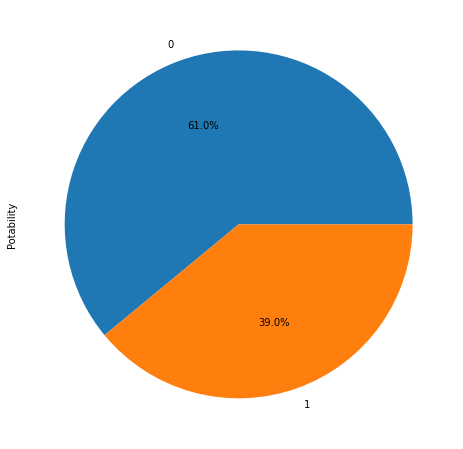

In [ ]:
print(df["Potability"].value_counts())
df["Potability"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(8,8));

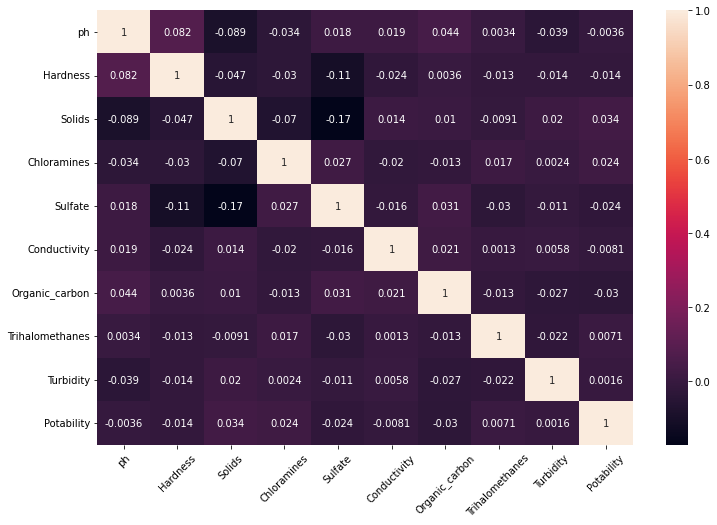

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=45);

There is not multicollniarity on this data.That means high correlation btw the features. 

In [4]:
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
#!pip install pandas_profiling  

In [ ]:
#pip install ipywidgets

In [6]:
profile = ProfileReport(df)
profile

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#!pip install pycaret

In [9]:
from pycaret.classification import *

In [10]:
clf=setup(data=df,target='Potability',session_id=1229,normalize=True)

,Description,Value
0,session_id,1229
1,Target,Potability
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3276, 10)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Potability', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_s...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('du

In [12]:
compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6729,0.6889,0.3382,0.6632,0.4459,0.2473,0.2766,0.017
et,Extra Trees Classifier,0.6707,0.6833,0.3115,0.6729,0.4239,0.2351,0.2701,0.379
rf,Random Forest Classifier,0.6659,0.6785,0.3394,0.6388,0.4411,0.2343,0.2589,0.699
lightgbm,Light Gradient Boosting Machine,0.6607,0.6708,0.4219,0.5937,0.4916,0.2484,0.2573,0.135
gbc,Gradient Boosting Classifier,0.6411,0.6391,0.2566,0.6017,0.3568,0.1606,0.1901,0.550
knn,K Neighbors Classifier,0.6310,0.6264,0.3795,0.5431,0.4460,0.1819,0.1891,0.047
nb,Naive Bayes,0.6271,0.5889,0.2400,0.5583,0.3331,0.1285,0.1519,0.016
lr,Logistic Regression,0.6145,0.5114,0.0145,0.6667,0.0282,0.0166,0.0724,0.021
ridge,Ridge Classifier,0.6145,0.0000,0.0145,0.6667,0.0282,0.0166,0.0724,0.016
lda,Linear Discriminant Analysis,0.6145,0.5115,0.0145,0.6667,0.0282,0.0166,0.0724,0.018


INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 3
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [14]:
x=df.drop("Potability",axis=1)
y=df.Potability

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [17]:
def classification_funct(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    from sklearn.model_selection import train_test_split   
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]

    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
       
    result=pd.DataFrame(columns=['accuracy_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [23]:
classification_funct(x_scaled,y)

,accuracy_score
SVC,0.695122
RandomForestClassifier,0.682927
XGBClassifier,0.676829
GaussianNB,0.631098
BernoulliNB,0.628049
LogisticRegression,0.628049
KNeighborsClassifier,0.626524
DecisionTreeClassifier,0.571646


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model=Sequential()
model.add(Dense(8, activation="relu"))
model.add(Dense(12, activation="relu"))   
model.add(Dense(10, activation="relu"))   
model.add(Dense(8, activation="relu"))   
model.add(Dense(6, activation="relu"))  
model.add(Dense(1, activation="sigmoid"))

In [21]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) 

In [24]:
model.fit(x_scaled,y, epochs=150, batch_size=10, verbose=1)

Epoch 1/150
328/328 [==============================] - 4s 6ms/step - loss: 0.6672 - accuracy: 0.6099
Epoch 2/150
328/328 [==============================] - 1s 4ms/step - loss: 0.6586 - accuracy: 0.6099
Epoch 3/150
328/328 [==============================] - 1s 4ms/step - loss: 0.6503 - accuracy: 0.6099
Epoch 4/150
328/328 [==============================] - 1s 4ms/step - loss: 0.6425 - accuracy: 0.6099
Epoch 5/150
328/328 [==============================] - 1s 4ms/step - loss: 0.6381 - accuracy: 0.6215
Epoch 6/150
328/328 [==============================] - 1s 4ms/step - loss: 0.6337 - accuracy: 0.6313
Epoch 7/150
328/328 [==============================] - 1s 2ms/step - loss: 0.6281 - accuracy: 0.6465
Epoch 8/150
328/328 [==============================] - 1s 2ms/step - loss: 0.6244 - accuracy: 0.6526
Epoch 9/150
328/328 [==============================] - 1s 2ms/step - loss: 0.6205 - accuracy: 0.6575
Epoch 10/150
328/328 [==============================] - 1s 2ms/step - loss: 0.6153 - accura

In [ ]:
# For high level forecasting I need more data for this issue.